In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#suppress warnings
import sys
import warnings

warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# **What is Time Series?**

Time Series is a set of observations on the values that a variable takes at different times. For example: Sales Trend, Stock Market Price, Weather Forecast etc.
Time Series is using to predict the future values based on the previous obseved value.

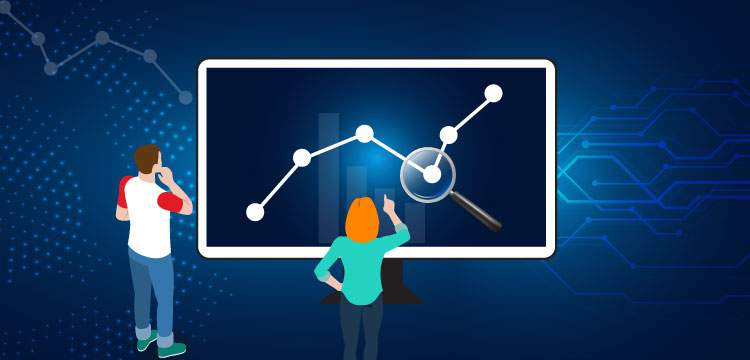

# **Component of Time Series**

* Trend : Tend may show the growth or decline in a time series over a long period. This is the type of tendency which continues to persist for a very long period. Prices and export and import data, for example, reflect obviously increasing tendencies over time.
* Seasonality : These are short term movements occurring in data due to seasonal factors. The short term is generally considered as a period in which changes occur in a time series with variations in weather or festivities
* Irregularity : These are sudden changes occurring in a time series which are unlikely to be repeated. They are components of a time series which cannot be explained by trends, seasonal or cyclic movements. These variations are sometimes called residual or random components.
* Cyclic : These are long term oscillations occurring in a time series. These oscillations are mostly observed in economics data and the periods of such oscillations are generally extended from five to twelve years or more. These oscillations are associated with the well known business cycles. 



# **What is ARIMA model?**

ARIMA stands for Auto Regressive Integrated Moving Average. There are seasonal and Non-seasonal ARIMA models that can be used for forecasting
An ARIMA model is characterized by 3 terms: p, d, q
where p is the order of the AR term, q is the order of the MA term and d is the number of differencing required to make the time series stationary.
If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.

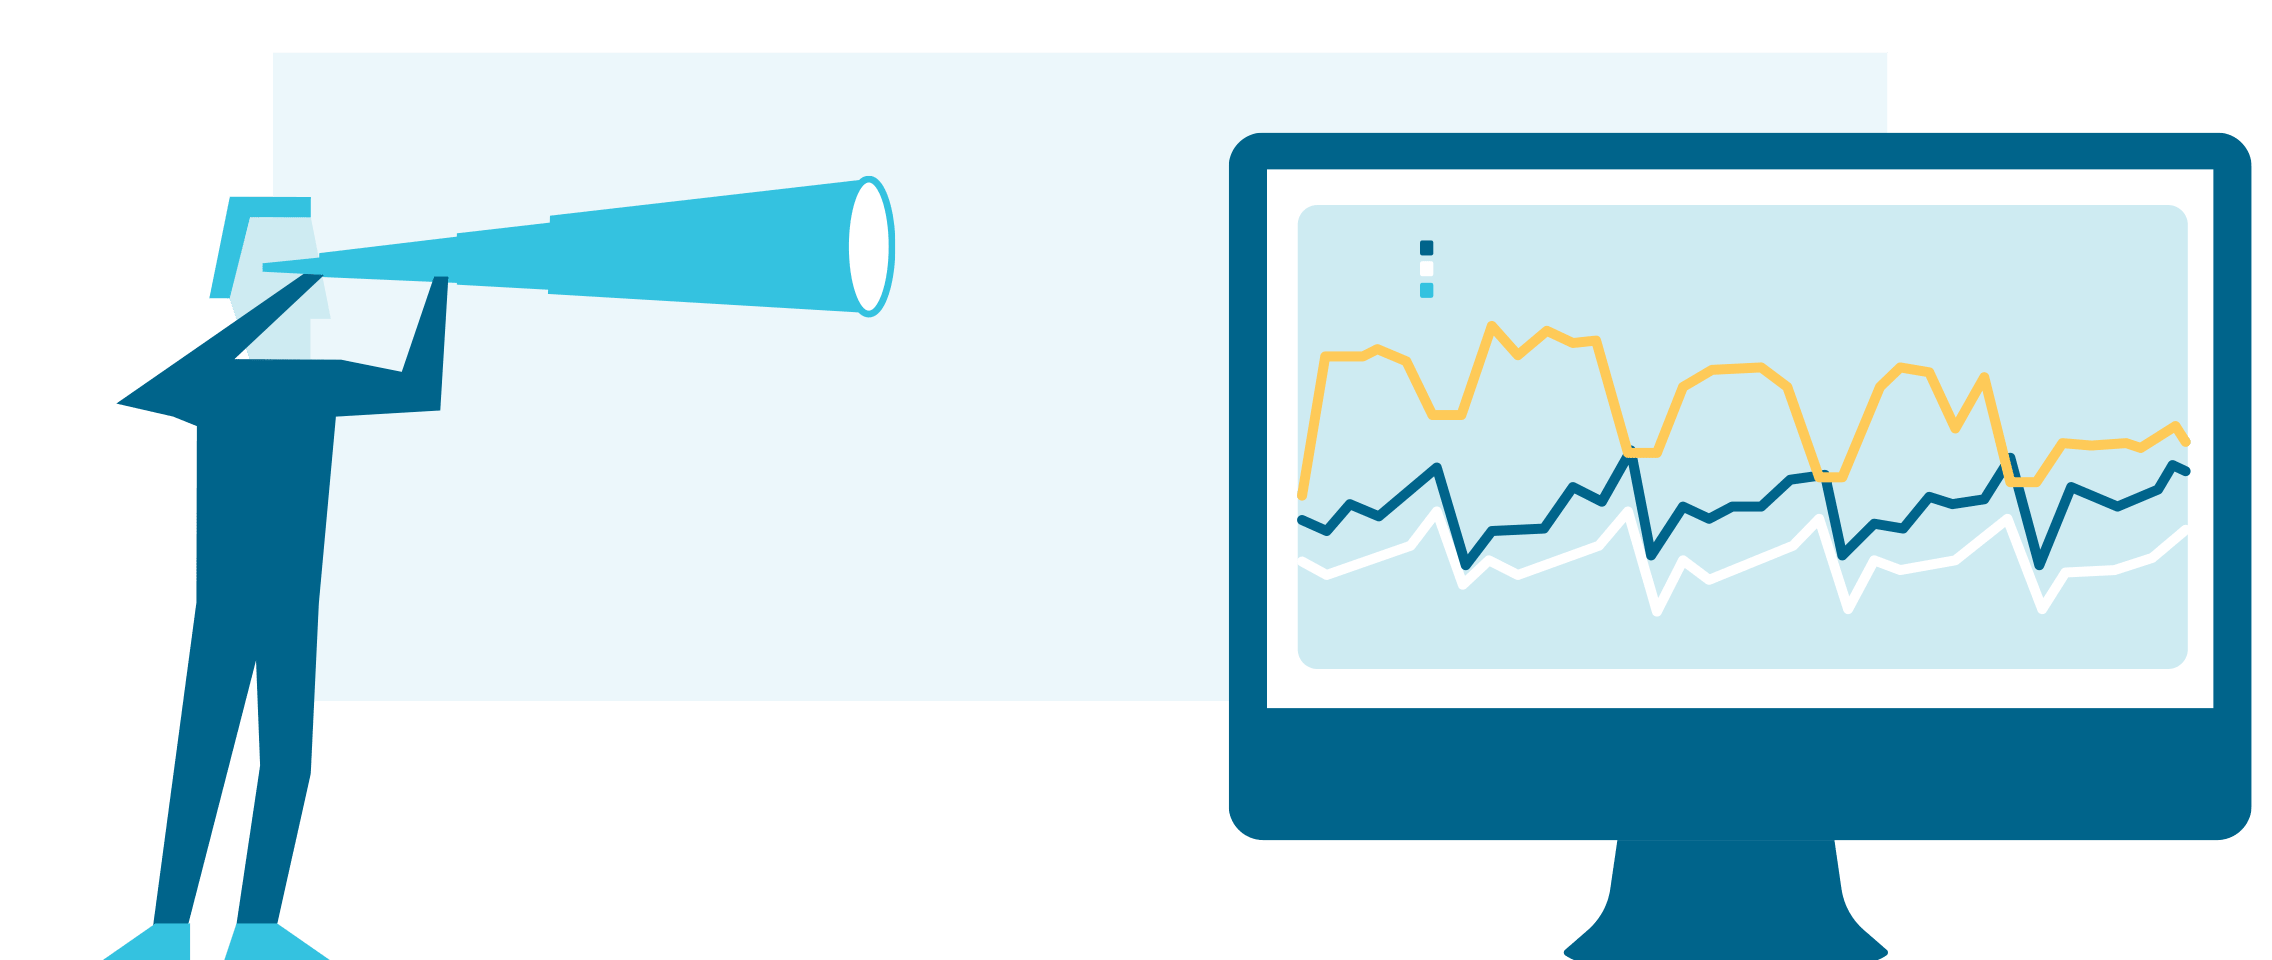

let’s get our environment ready with the libraries we’ll need and then import the data!

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Import data

In [5]:
accidents = pd.read_csv("accidents_2005_to_2007.csv")
#accident5_7 = pd.read_csv("accidents_2005_to_2007.csv")
#accident9_11 = pd.read_csv("accidents_2009_to_2011.csv")
#accident12_14 = pd.read_csv("accidents_2012_to_2014.csv")

In [ ]:
#accidents = pd.concat([accident5_7, accident9_11, accident12_14], axis = 0)

In [6]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [7]:
accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [9]:
Date=accidents[['Date','Accident_Index','Year']]
Date=pd.DataFrame(Date,columns=['Date','Accident_Index','Year'])
Date=Date.drop_duplicates(ignore_index=True)
Date

,Date,Accident_Index,Year
0,04/01/2005,200501BS00001,2005
1,05/01/2005,200501BS00002,2005
2,06/01/2005,200501BS00003,2005
3,07/01/2005,200501BS00004,2005
4,10/01/2005,200501BS00005,2005
...,...,...,...
367438,27/08/2007,200797UD71008,2007
367439,23/04/2007,200797UD71104,2007
367440,27/05/2007,200797UD71105,2007
367441,28/05/2007,200797UD71205,2007


First we need to convert date to month format - YYYY-MM

In [10]:
Date['Date'] = pd.to_datetime(Date['Date'])

In [11]:
#Date.groupby(['Date'])[['Accident_Index','Count']].count().sort_values(ascending=True)
df=Date.groupby(['Date']).agg({'Accident_Index': ['count']}).reset_index()

In [12]:
df.columns = ['Date','Total_Accident']
df

,Date,Total_Accident
0,2005-01-01,214
1,2005-01-02,439
2,2005-01-03,420
3,2005-01-04,285
4,2005-01-05,310
...,...,...
1090,2007-12-27,188
1091,2007-12-28,214
1092,2007-12-29,212
1093,2007-12-30,123


Check out the Data

In [13]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1095 non-null   datetime64[ns]
 1   Total_Accident  1095 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB


Convert the Date column to Date type

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Total_Accident
0,2005-01-01,214
1,2005-01-02,439
2,2005-01-03,420
3,2005-01-04,285
4,2005-01-05,310


Sorting the data by Date

In [15]:
df = df.sort_values(by=['Date'])
df.head()

,Date,Total_Accident
0,2005-01-01,214
1,2005-01-02,439
2,2005-01-03,420
3,2005-01-04,285
4,2005-01-05,310


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1095 non-null   datetime64[ns]
 1   Total_Accident  1095 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 25.7 KB


Set the Date for index

In [18]:
accident = df.set_index('Date')
accident.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2007-12-22', '2007-12-23', '2007-12-24', '2007-12-25',
               '2007-12-26', '2007-12-27', '2007-12-28', '2007-12-29',
               '2007-12-30', '2007-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

Let's extract the average number of accident in each month

In [19]:
y = accident['Total_Accident'].resample('MS').mean()
y.head()

Date
2005-01-01    375.645161
2005-02-01    342.250000
2005-03-01    324.290323
2005-04-01    352.266667
2005-05-01    357.774194
Freq: MS, Name: Total_Accident, dtype: float64

Let's visualise the number of accident in each year

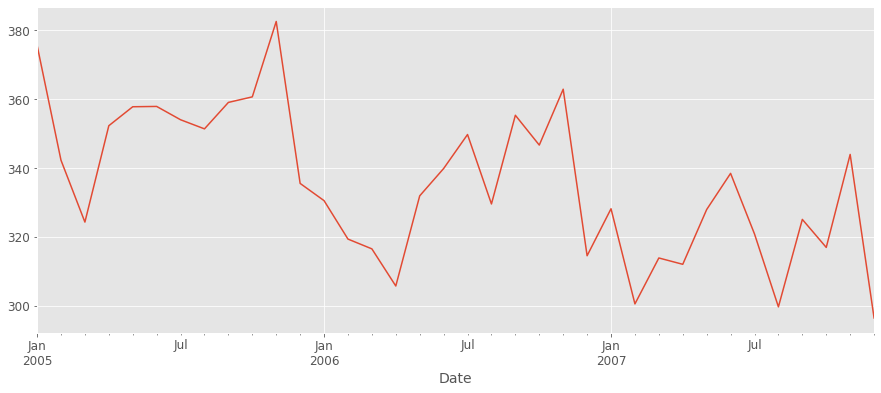

In [20]:
y.plot(figsize=(15, 6))
plt.show()

Let's visualise the data using time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

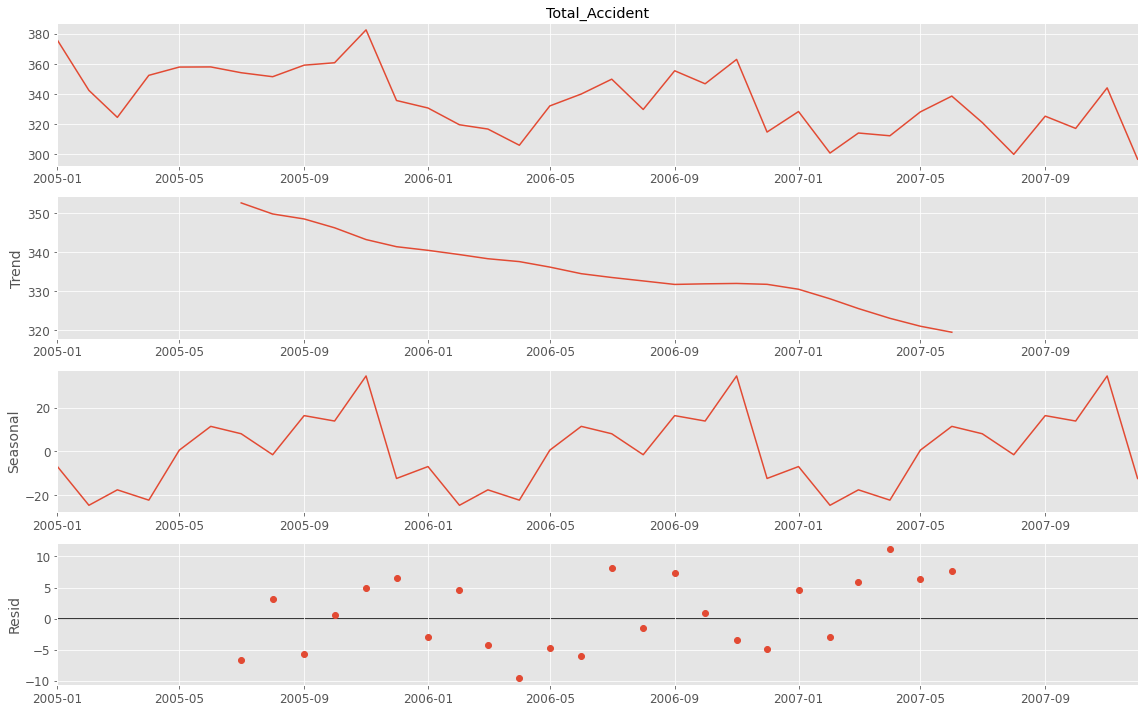

In [21]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:523.0432252210821
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:502.4147953676657
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:219.14770260306327
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:219.00252268910776
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:394.88214957115673
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:394.81537653288416
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:219.01313360552993
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:220.9995349232821
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:483.4308799364975
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:462.5948629352182
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:211.81641621305857
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:213.51478335084778
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:376.69147279115725


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:379.62220778282904
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:213.48634079084178


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:215.35946193330113
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:315.335015592099
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:307.1854854239358
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:193.74172062210476
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:193.6529923885705
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:299.9637738789524
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:300.38521350225983
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:193.65299664272524
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:195.65299454662468
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:311.0471114353759
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:302.1067689914026
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:190.19444650107403
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:188.4063102535706
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:294.7131985855562


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:294.2049476830082
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:188.33042356398454
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:190.33045406551417
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:331.7861505062062
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:323.6662713928686
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:202.99977014996733
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:204.14319658994705
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:316.2397692850938
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:315.7786412371099
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:203.86331284034463


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:205.29686862469808
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:327.53088077164756
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:318.61765988601763
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:201.47466070739478


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:199.4922508132463
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:311.2630846075792
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:310.8791306538068
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:199.31615479552903
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:201.27725944925686
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:311.4874889113752
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:303.99199435954813
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:192.24619866474947
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:191.5332187102348
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:296.7057236945108


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:296.35605384481386
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:191.5312889108357


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:193.53000649684688
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:309.96348014816033
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:306.04890894083513
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:192.01263496476665
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:190.247909486187
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:295.70578317528407
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:299.5376952190494
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:190.13467467906975
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:192.09589502302453


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The above output suggests that SARIMAX (1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 289.92. Therefore we should consider this to be optimal option.

**Fitting the ARIMA model**

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2134      0.315      0.679      0.497      -0.403       0.830
ma.L1         -1.0010     27.068     -0.037      0.970     -54.053      52.051
ar.S.L12      -0.9517     34.834     -0.027      0.978     -69.225      67.322
ma.S.L12       0.6814    108.573      0.006      0.995    -212.117     213.480
sigma2        94.6506   7244.477      0.013      0.990   -1.41e+04    1.43e+04


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We need to always run model diagnostics to investigate any unusual behavior.

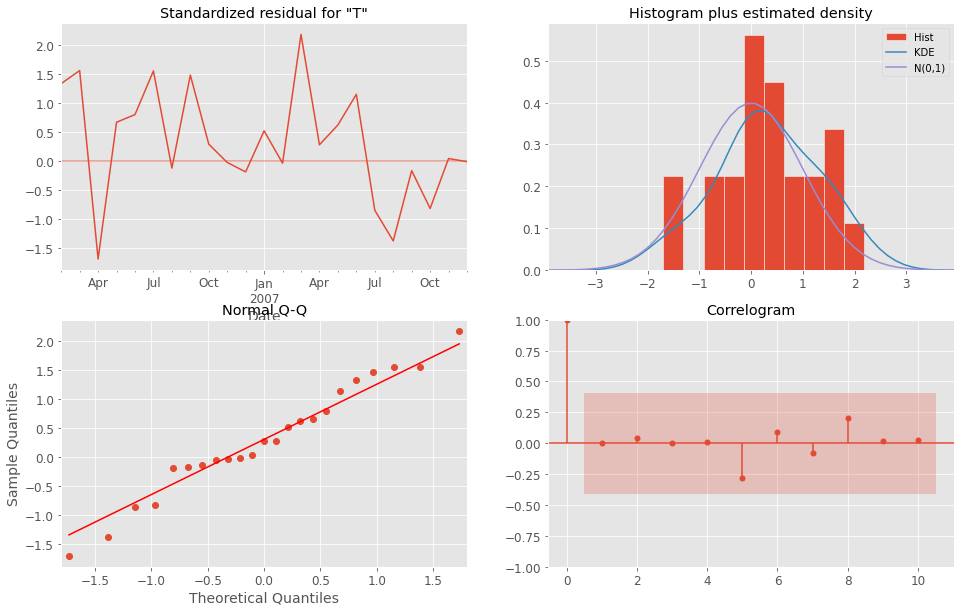

In [25]:
results.plot_diagnostics()
plt.show()

**Evaluation of Forecasts**

In odrer to understand the accuracy of our forecasts, we compare predicted number of accident to real number of accidents of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

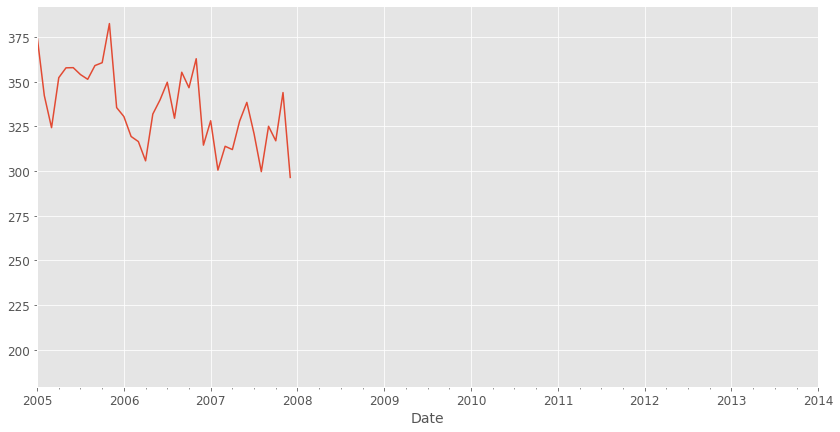

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2005':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Accidents')
plt.legend()
plt.show()

Let's find out the MSE to see the accuracy of our model. 
The mean squared error (MSE) is largely used as a metric to determine the performance of an algorithm. In addition, MSE is the average of the square of the difference between the observed and predicted values of a variable.

In [27]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is nan


**Visualising Forecasts**

As we can see in the below graph the number of road accident in UK will be declined in next years

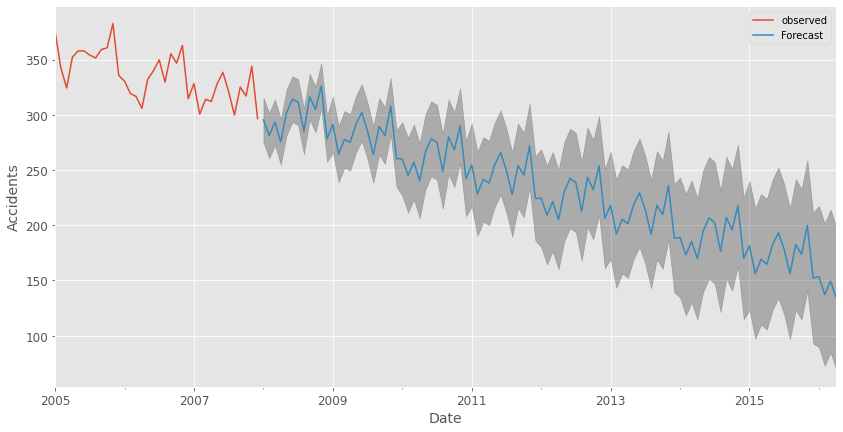

In [28]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Accidents')
plt.legend()
plt.show()